[[-8.         -7.97064579 -7.94129159 ...  6.94129159  6.97064579
   7.        ]
 [-7.97647059 -7.94711638 -7.91776217 ...  6.964821    6.9941752
   7.02352941]
 [-7.95294118 -7.92358697 -7.89423276 ...  6.98835041  7.01770462
   7.04705882]
 ...
 [-2.04705882 -2.01770462 -1.98835041 ... 12.89423276 12.92358697
  12.95294118]
 [-2.02352941 -1.9941752  -1.964821   ... 12.91776217 12.94711638
  12.97647059]
 [-2.         -1.97064579 -1.94129159 ... 12.94129159 12.97064579
  13.        ]]    [[11.         11.         11.         ... 11.         11.
  11.        ]
 [10.95294118 10.95294118 10.95294118 ... 10.95294118 10.95294118
  10.95294118]
 [10.90588235 10.90588235 10.90588235 ... 10.90588235 10.90588235
  10.90588235]
 ...
 [-0.90588235 -0.90588235 -0.90588235 ... -0.90588235 -0.90588235
  -0.90588235]
 [-0.95294118 -0.95294118 -0.95294118 ... -0.95294118 -0.95294118
  -0.95294118]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]]    [[ 7.          6.97064579  

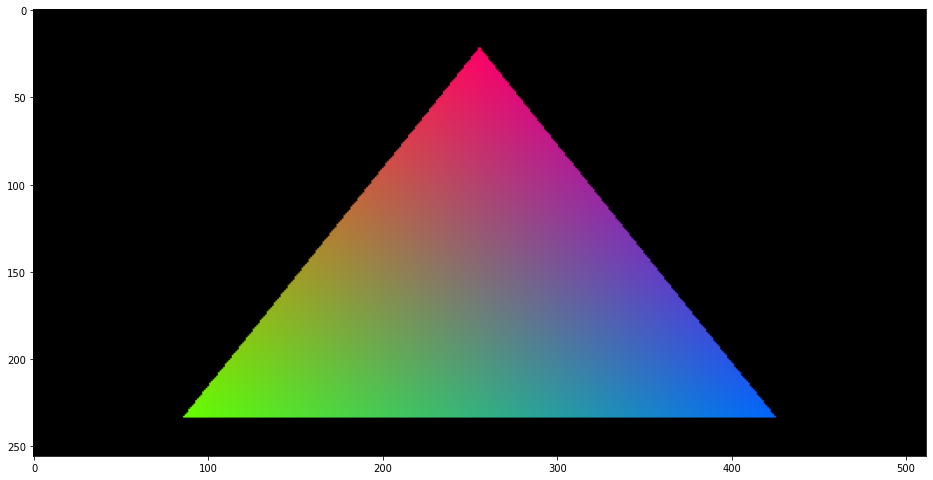

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
plt.rcParams['figure.figsize'] = (16, 4)

N, M = 256j, 512j
O = np.ones((int(N.imag), int(M.imag), 3))                        # Init image plane origin
O[..., 1], O[..., 0] = np.mgrid[0.5:-0.5:N, 1:-1:M]               # Image plane uvw coordinates
e_ = O/np.linalg.norm(O, axis=2)[..., np.newaxis]                 # Normalized ray directon e_

# Triangle 
A = np.array([0 , 1.25 , 3])                                      # Point A
B = np.array([2 , -1.25, 3])                                      # Point B
C = np.array([-2, -1.25, 3])                                      # Point C

AB = B - A                                                        # Oriented segment A to B
AC = C - A                                                        # Oriented segment A to C
n = np.cross(AB, AC)                                              # Normal vector
n_ = n/np.linalg.norm(n)                                          # Normalized normal


# Using the point A to find d
d = - np.dot(n_, A)

# Finding parameter t
vec_dot = np.vectorize(np.dot, signature='(n),(m)->()')           # Vectorize dot product function
t = - (vec_dot(n_, O) + d)/vec_dot(n_, e_) 


# Finding P
P = O + t[..., np.newaxis]*e_
# Get the resulting vector for each vertex
# following the construction order
Pa = vec_dot(np.cross(B - A, P - A), n_)                          # Resulting vector of A
Pb = vec_dot(np.cross(C - B, P - B), n_)                          # Resulting vector of B
Pc = vec_dot(np.cross(A - C, P - C), n_)                          # Resulting vector of C

print(Pa , "  " , Pb , "  " , Pc)


cond = np.logical_and(np.logical_and(Pa >= 0, Pb >= 0), Pc >= 0)  # Inside the triangle conditionals

# count_yes = 0
# count_no = 0
# for i in cond:
#     if i==False:
#         count_no+=1
#     if i==True:
#         count_yes+=1

# print(f"{count_yes}/{count_no+count_yes}")

# Calculate barycentric coordinates
Aa = np.cross(B - A, P - A)                                       # Resulting vector of A and P
Aa = np.linalg.norm(Aa, axis=2)                                   # Area of triangle ABP
Ab = np.cross(C - B, P - B)                                       # Resulting vector of B and P
Ab = np.linalg.norm(Ab, axis=2)                                   # Area of triangle BCP
Ac = np.cross(A - C, P - C)                                       # Resulting vector of C and P
Ac = np.linalg.norm(Ac, axis=2)                                   # Area of triangle CAP
At = np.cross(C - A, B - A)                                       # Resulting vector of triangle
At = np.linalg.norm(At)                                           # Area of triangle ABC

# Getting the barycenter weights
alpha = (Ab/At)[..., np.newaxis]
beta = (Ac/At)[..., np.newaxis]
gamma = (Aa/At)[..., np.newaxis]

# Output image
output = np.zeros((int(N.imag), int(M.imag), 3))                  # Init output image
Ca = np.array([1, 0, 0.4])                                        # Color vertex A
Cb = np.array([0.4, 1, 0])                                        # Color vertex B
Cc = np.array([0, 0.4, 1])                                        # Color vertex C
Cd = (alpha*Ca + beta*Cb + gamma*Cc)/(alpha + beta + gamma)       # Interpolated color based on barycentric coordinates

output[cond] = Cd[cond]                                           # Shade with the interpolated colors


# Visualization
fig, ax = plt.subplots(figsize=(16, 10))
ax.imshow(output)
plt.show()

